In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% ! important;}
div.cell.code_cell.rendered{width:100%}
div.input_prompt{padding:0px}
div.CodeMirror {font-family:Consolas ; font-size:12pt;}
div.text_cell_render.rendered_html {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold}
div.input {font-family:Consolas ; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch.10 N차원 배열(numpy배열)다루기_1절~3절</font></b>
- [numpy](http://www.numpy.org)
- [numpy doc](https://numpy.org/doc/stable)
- 2차원 배열은 행렬개념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)
# 1절 numpy패키지

In [2]:
import numpy as np
np.__version__

'1.23.5'

In [3]:
# np.arange(from,stop,by) : from부터 stop 앞까지 by씩 증가하는 1차원 배열 생성
a= np.arange(15) # 0 부터 15 앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [4]:
from numpy import arange
a = arange(15, 
           #dtype=np.int32
          ).reshape(3,5) # 3행 5열 짜리 2차원 배열로 변환, 갯수 안 맞추면 error
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [5]:
type(a)

numpy.ndarray

In [6]:
a.dtype # a배열의 요소들의 type

dtype('int32')

In [7]:
a.dtype.name

'int32'

In [8]:
a.itemsize # a배열안의 한 요소의 bytesize

4

In [9]:
a.ndim # 축수(차원수)

2

In [10]:
a.size # 배열 요소의 갯수 (len(a)는 행의 갯수를 출력해서 3)

15

In [11]:
a.shape # 배열의 구조(3행 5열)

(3, 5)

In [12]:
print('shape 조정 전 a\n',a)
a.shape=(5,3)
print('shpae 조정 후 a\n',a)

shape 조정 전 a
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
shpae 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [13]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [14]:
a.size

12

In [15]:
a.dtype

dtype('int32')

In [16]:
a.itemsize

4

In [17]:
a.dtype = np.int64 # 읽을 때 int64로 (64bit씩) 읽는다
a.dtype

dtype('int64')

In [18]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [19]:
a.itemsize

8

In [20]:
a.size

6

In [21]:
# 배열 요소의 타입을 수정
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [22]:
a= a.astype('int64')
# a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [23]:
a.itemsize

8

In [24]:
a.size

12

In [25]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [26]:
a.ravel() # flatten 된 배열 return

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [27]:
a.flatten() #함수의 결과과가 return되면 배열 수정안함

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

## 1.3 배열 저장
- pkl(객체저장, 배열, 머신러닝 모델) vs npy(넘파이 전용 포맷, io속도 개선)

In [28]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [29]:
%%time
import pickle
with open('data/ch10.pkl','wb') as f:
    pickle.dump(a,f)

CPU times: total: 0 ns
Wall time: 0 ns


In [30]:
%%time
with open('data/ch10.pkl','rb') as f:
    loaded_a=pickle.load(f)

CPU times: total: 0 ns
Wall time: 2.95 ms


In [31]:
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [32]:
%%time
np.save('data/ch10.npy',a)

CPU times: total: 0 ns
Wall time: 0 ns


In [33]:
%%time
loaded_a2 = np.load('data/ch10.npy')

CPU times: total: 0 ns
Wall time: 0 ns


# 2절 numpy배열
- array()함수를 이용하여 다른 파이썬 구조(list,tuple)를 배열로 변환
- 기타함수들 : arange, ones, zeors, full, empty......linspace
- 랜덤값을 갖는 함수들 : np.random.~
## 2.1 array()함수로 numpy 배열 만들기
    - array(obj, dtype = np.xx|'xx', copy =T/F)

In [34]:
a = np.array([2,4,6], dtype=np.int16) # 정수의 기본 타입은 int 32
a

array([2, 4, 6], dtype=int16)

In [35]:
a[0],a[1],a[2]

(2, 4, 6)

In [36]:
for i in a:
    print(i, end = '\t')

2	4	6	

In [37]:
b=np.array([[1.5,2.3], #배열은 동일 자료형의 집합  : 정수 -> 실수 -> 문자
            [4, 5]])
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [38]:
b[0][1], b[0,1] # 2차원 [axis 0행, axis 1열]

(2.3, 2.3)

In [39]:
print(b.dtype) # 정수 기본타입은 int32, 실수 기본타입은 float64
print(b.itemsize)      

float64
8


In [40]:
b=b.astype(np.float32) # 함수의 결과를 return하면 a는 그대로
b

array([[1.5, 2.3],
       [4. , 5. ]], dtype=float32)

In [41]:
print(b.dtype)
print(b.itemsize)  

float32
4


In [42]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()

1.5	2.3	
4.0	5.0	


In [43]:
for i,row in enumerate(b):
    for j,item in enumerate(row):
        print('{}행 {}열 : {:.1f}({:.1f})'.format(i,j, item, b[i,j]), end ='\t')
    print()

0행 0열 : 1.5(1.5)	0행 1열 : 2.3(2.3)	
1행 0열 : 4.0(4.0)	1행 1열 : 5.0(5.0)	


In [44]:
# 행렬의 인덱싱, 슬라이싱
b=np.array([[1,2,3,4,5],[6,7,8,9,0],[11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13, 14, 15]], dtype=int16)

In [45]:
b[0,1]

2

In [46]:
b[3,0] # 없는 인덱싱시 에러

IndexError: index 3 is out of bounds for axis 0 with size 3

In [47]:
print('0~1행, 1~2열 : \n', b[0:2,1:3])
print('2행 모두:(1차원)', b[2,:], b[2]) # 특정 행의 모든 열을 추출할 경우, 열 생략 가능
print('2행 모두:(2차원)', b[2:3,:], b[2:3]) # 특정 행의 모든 열을 추출할 경우, 열 생략 가능
print('4열(마지막열)(1차원)모두 : ', b[:,4], b[...,4], b[:,-1])  # 특정 열의 모든 행을 추출할 경우
print('2행 0~3열 : ', b[2,0:-1])
print('마지막열 제외 :\n', b[:,:-1])

0~1행, 1~2열 : 
 [[2 3]
 [7 8]]
2행 모두:(1차원) [11 12 13 14 15] [11 12 13 14 15]
2행 모두:(2차원) [[11 12 13 14 15]] [[11 12 13 14 15]]
4열(마지막열)(1차원)모두 :  [ 5  0 15] [ 5  0 15] [ 5  0 15]
2행 0~3열 :  [11 12 13 14]
마지막열 제외 :
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [48]:
# 스칼라 변수
a=10
copy_a = a
print(f"a={a},복제본{copy_a}")
copy_a=-1
print(f"a={a},복제본{copy_a}")

a=10,복제본10
a=10,복제본-1


In [49]:
# 데이터 구조
a=[0,1]
copy_a = a.copy() # 깊은 복사
print(f"a={a},복제본{copy_a}")
copy_a[0]=-1
print(f"a={a},복제본{copy_a}")

a=[0, 1],복제본[0, 1]
a=[0, 1],복제본[-1, 1]


In [52]:
# numpy 배열
c = np.array([[1,2],[3,4]])
# d=c # 주소할당
d= np.array(c,copy=True) # 깊은 복사
print('c=',c,sep='\n')
print('d=',d,sep='\n')
print(id(c),id(d))
d[0,0] = 9
print('c=',c,sep='\n')
print('d=',d,sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
2472115205680 2472115197424
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros(tup) : 요소들이 다 0
- np.ones(tup) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 두번째 매개변수
- np.empty(tup) : 초기 내용은 임의값인 배열(메모리 상태에 따라 초기값이 달라짐)

※ 위의 함수를 이용해서 생성된 배열을 기본 dtype float64속성을 따로 지정 가능

In [54]:
np.zeros((3,)) # 3열 짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [57]:
x = np.zeros((2,5),dtype=np.bool8)
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


In [59]:
np.ones((2,5), dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [65]:
np.full((2,3),-1.2)

array([[-1.2, -1.2, -1.2],
       [-1.2, -1.2, -1.2]])

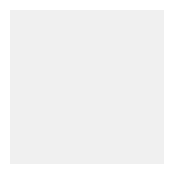

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2)) # 시각화한 그래프 크기 figsize=(가로,세로)
img = np.full((28,28),240 , dtype=np.uint8)
# img.dtype
plt.imshow(img, cmap='gray', vmin=0,vmax=255)
plt.axis('off')
plt.show()

In [80]:
np.empty((3,2)) # 초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) :o부터 1 미만의 균등분포를 갖는 랜덤값 배열
- np.random.uniform(low=0.0, high=1.0, size = tup) : low부터 high 미만의 균등분포를 갖는 렌덤값
- np.random.nomal(loc =0.0, scale=1.0,size=tup) : 평균loc과 표준편차 scale을 갖는 정규분포 랜덤값

- np.random.rand(n) : 균등분포의 1차원 난수 배열발상 (난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차1)

cf) np.random.randint(from,to) : from(기본값0) 부터 to미만의 정수 난수 1개 발생==random.randint(from,to-1)

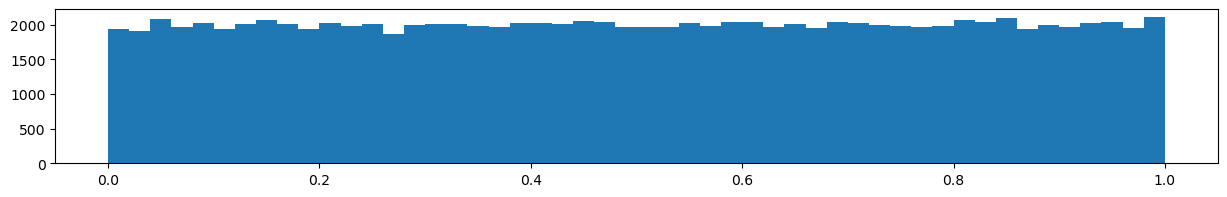

In [96]:
import matplotlib.pyplot as plt
x = np.random.rand(100000) 
# print(x)
plt.figure(figsize=(15,2)) # 그래프 크기
plt.hist(x, bins=50)
plt.show()

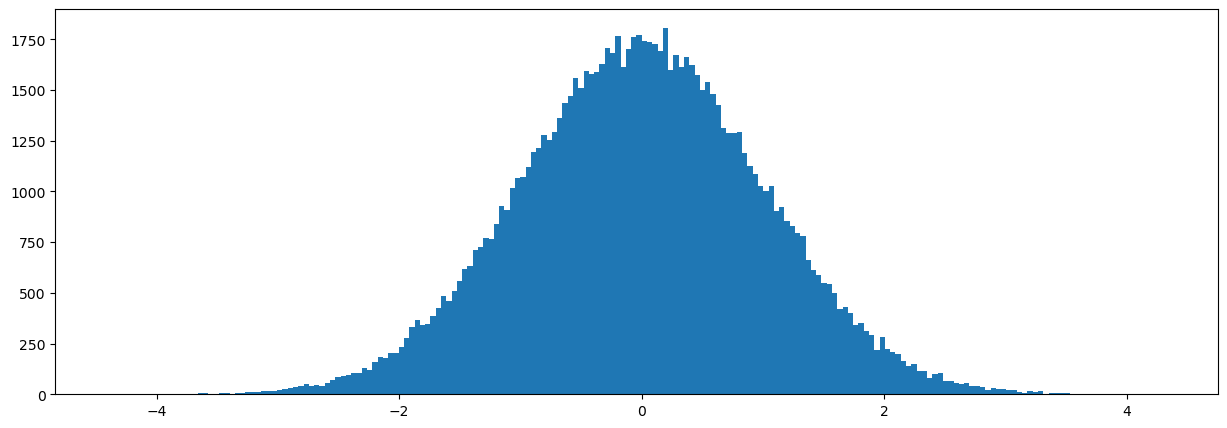

In [98]:
x = np.random.randn(100000) #정규분포(표준정규분포는 평균 0, 표준편차가 1인 정규분포)
plt.figure(figsize=(15,5)) # 그래프 크기
plt.hist(x, bins=200)
plt.show()

In [99]:
# 1차원 난수 배앨
print(np.random.rand(3)) #균등분포
print(np.random.randn(3)) # 정규분포

[0.91196614 0.05312203 0.31174327]
[-0.5812607   0.31587395  0.61975484]


In [108]:
# 2차원 닌수 배열
np.random.random((2,5)) # 2행 5열짜리 균등분포(0~1미만) 난수 배열

array([[0.59788351, 0.30123827, 0.67363705, 0.6991406 , 0.76679404],
       [0.25593395, 0.1679473 , 0.65129261, 0.33512967, 0.54942084]])

In [113]:
np.random.uniform(low=-2, high =2, size=(2,5))#2행 5열짜리 균등분포(-2~2미만) 난수 배열

array([[ 1.85552013,  1.96698755,  1.88298959,  1.99710381, -0.71573078],
       [-0.51331484, -1.88736485, -1.18009806, -0.97840952,  1.71055897]])

In [115]:
np.random.normal(size=(2,5)) # 2행 5열짜리 정규 분포(평균0, 표준편차1) 난수 발생

array([[ 0.23209982,  0.57262216,  0.95514873,  2.7009509 , -1.52374676],
       [-0.36968636,  0.285091  ,  0.3469096 ,  1.50842757, -1.47820437]])

In [116]:
np.random.normal(-1, 1, (2,5)) # 2행 5열짜리 정규 분포(평균-1, 표준편차1) 난수 발생

array([[-1.02806224, -2.07537997,  0.42140584, -0.2140566 , -0.76199284],
       [-0.15015062, -1.90888908,  0.6369453 , -1.68490562, -1.75762996]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to 앞까지 by씩 건너 뛴 값을 1차원 배열로 생성
- np.linspace(from,to,num) : from부터 to까지(to포함)까지 num개 숫자들을 1차원 배열로 생성

In [118]:
np.arange(10,30,5,dtype=np.float64)

array([10., 15., 20., 25.])

In [120]:
np.arange(0,2.0,0.3,dtype=np.float64)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [122]:
np.linspace(0,5,5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

In [128]:
# linsapce : 특정한 범위의 수들을 많이 생성할 때
from numpy import pi, linspace
x = linspace(0,2*pi,1000)
y=np.sin(x)

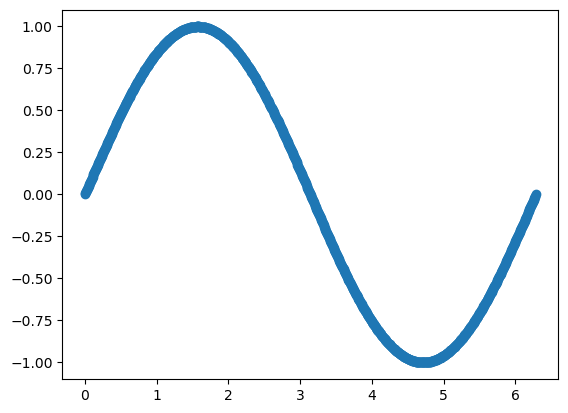

In [129]:
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원 변경
- reshape(행수, 열수) : -1 가능
- resize(행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [130]:
t = np.random.random((2,3))
t

array([[0.24017212, 0.71048154, 0.95780678],
       [0.97940516, 0.91441212, 0.71505369]])

In [131]:
np.array([1,2,3])*3

array([3, 6, 9])

In [134]:
a = np.round(t*10)
a

array([[ 2.,  7., 10.],
       [10.,  9.,  7.]])

In [136]:
a = a.astype(np.int8)
a

array([[ 2,  7, 10],
       [10,  9,  7]], dtype=int8)

In [141]:
a = a.reshape(3,2)
a

array([[ 2,  7],
       [10, 10],
       [ 9,  7]], dtype=int8)

In [142]:
a.reshape(-1,1) # -1이 주어지면 해당차원의 크기가 자동 계산

array([[ 2],
       [ 7],
       [10],
       [10],
       [ 9],
       [ 7]], dtype=int8)

In [143]:
a.reshape(3,-1)

array([[ 2,  7],
       [10, 10],
       [ 9,  7]], dtype=int8)

In [144]:
a.resize(2,3) # 실행결과가 출력 안 되면 a가 바뀜
a

array([[ 2,  7, 10],
       [10,  9,  7]], dtype=int8)

In [145]:
a.reshape((3,2))

array([[ 2,  7],
       [10, 10],
       [ 9,  7]], dtype=int8)

In [147]:
a.resize((3,2))
a

array([[ 2,  7],
       [10, 10],
       [ 9,  7]], dtype=int8)

In [148]:
a.resize(2,-1) # resize는 -1 사용 불가

ValueError: negative dimensions not allowed

In [149]:
a

array([[ 2,  7],
       [10, 10],
       [ 9,  7]], dtype=int8)

In [150]:
#  전치행렬(x행 y열 -> y행 x열)
a.T # a의 전치행렬

array([[ 2, 10,  9],
       [ 7, 10,  7]], dtype=int8)

In [151]:
a.transpose() # a의 전치행렬

array([[ 2, 10,  9],
       [ 7, 10,  7]], dtype=int8)

## 2.6 배열 출력

In [152]:
np.arange(1000)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [155]:
# 배열 요소가 몇 개 까지 다 출력되나. 1000개 요소 이상은 생략되서 출력
np.get_printoptions()['threshold']

1000

In [156]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리 부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [159]:
# 인쇄옵션변경
import sys
np.set_printoptions(threshold=sys.maxsize) # 정수 최대까지 출력
np.set_printoptions(threshold=np.inf)
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14